<a href="https://colab.research.google.com/github/neehasajja/waymo-opendataset/blob/main/testing/lidar_calibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
     

Mounted at /content/drive


In [ ]:
!pip3 install waymo-open-dataset-tf-2-6-0

In [3]:
import os
import pyarrow.parquet as pq

# Set the path to the metadata file
metadata_file_path = '/content/drive/MyDrive/testing/lidar_calibration/_metadata'

# Read the metadata file
metadata_file = pq.ParquetFile(metadata_file_path)

# Get the metadata
file_metadata = metadata_file.metadata
schema_metadata = file_metadata.metadata

# Print the metadata
print("File metadata:", file_metadata)
print("Schema metadata:", schema_metadata)

File metadata: <pyarrow._parquet.FileMetaData object at 0x7f5de80555e0>
  created_by: parquet-cpp-arrow version 10.0.1
  num_columns: 6
  num_rows: 80
  num_row_groups: 16
  format_version: 2.6
  serialized_size: 19311
Schema metadata: {b'ARROW:schema': b'/////6ACAAAQAAAAAAAKAAwABgAFAAgACgAAAAABBAAMAAAACAAIAAAABAAIAAAABAAAAAYAAAAsAgAA2AEAAEQBAADoAAAAjAAAAAQAAAD8/f//AAABDBQAAABIAAAABAAAAAEAAABAAAAAMwAAAFtMaURBUkNhbGlicmF0aW9uQ29tcG9uZW50XS5iZWFtX2luY2xpbmF0aW9uLnZhbHVlcwAI/v//VP7//wAAAQMQAAAAGAAAAAQAAAAAAAAABAAAAGl0ZW0AAAAAxv7//wAAAgCA/v//AAABAxAAAABEAAAABAAAAAAAAAAwAAAAW0xpREFSQ2FsaWJyYXRpb25Db21wb25lbnRdLmJlYW1faW5jbGluYXRpb24ubWF4AAAAAB7///8AAAIA2P7//wAAAQMQAAAARAAAAAQAAAAAAAAAMAAAAFtMaURBUkNhbGlicmF0aW9uQ29tcG9uZW50XS5iZWFtX2luY2xpbmF0aW9uLm1pbgAAAAB2////AAACADD///8AAAEQFAAAAEwAAAAEAAAAAQAAAEgAAAAvAAAAW0xpREFSQ2FsaWJyYXRpb25Db21wb25lbnRdLmV4dHJpbnNpYy50cmFuc2Zvcm0AAAAGAAgABAAGAAAAEAAAAJD///8AAAEDEAAAABwAAAAEAAAAAAAAAAQAAABpdGVtAAAGAAgABgAGAAAAAAACAMD///8AAAECEAAAACgAAAAEAAAAAAAAAA4A

In [ ]:
import os
import pyarrow.parquet as pq
import tensorflow as tf

# Set the path to the directory containing the parquet files
dir_path = '/content/drive/MyDrive/testing/lidar_calibration/'
# Get a list of all the files in the directory
files = os.listdir(dir_path)

# Loop through each file and extract metadata
for filename in files:
    # Skip directories
    if os.path.isdir(os.path.join(dir_path, filename)):
        continue
        
    # Check if the file is a parquet file
    if filename.endswith('.parquet'):
        # Read the parquet file
        parquet_file = pq.ParquetFile(os.path.join(dir_path, filename))

        # Get the metadata
        metadata = parquet_file.metadata

        # Print the metadata
        print("File:", filename)
        print(metadata)

File: 10504764403039842352_460_000_480_000.parquet
  created_by: parquet-cpp-arrow version 10.0.1
  num_columns: 6
  num_rows: 5
  num_row_groups: 1
  format_version: 2.6
  serialized_size: 2188
File: 5026942594071056992_3120_000_3140_000.parquet
  created_by: parquet-cpp-arrow version 10.0.1
  num_columns: 6
  num_rows: 5
  num_row_groups: 1
  format_version: 2.6
  serialized_size: 2190
File: 18149616047892103767_2460_000_2480_000.parquet
  created_by: parquet-cpp-arrow version 10.0.1
  num_columns: 6
  num_rows: 5
  num_row_groups: 1
  format_version: 2.6
  serialized_size: 2192
File: 8688567562597583972_940_000_960_000.parquet
  created_by: parquet-cpp-arrow version 10.0.1
  num_columns: 6
  num_rows: 5
  num_row_groups: 1
  format_version: 2.6
  serialized_size: 2186
File: 7247823803417339098_2320_000_2340_000.parquet
  created_by: parquet-cpp-arrow version 10.0.1
  num_columns: 6
  num_rows: 5
  num_row_groups: 1
  format_version: 2.6
  serialized_size: 2190
File: 1098013301508070

In [4]:
import os
import pyarrow.parquet as pq
import pandas as pd

# Set the path to the directory containing the parquet files
dir_path = '/content/drive/MyDrive/testing/lidar_calibration/'

# Get a list of all the files in the directory
files = os.listdir(dir_path)

# Loop through each file and extract metadata
for filename in files:
    # Skip directories
    if os.path.isdir(os.path.join(dir_path, filename)):
        continue
        
    # Check if the file is a parquet file
    if filename.endswith('.parquet'):
        # Read the parquet file
        parquet_file = pq.ParquetFile(os.path.join(dir_path, filename))

        # Get the table from the file
        table = parquet_file.read()

        # Convert the table to a Pandas DataFrame
        df = table.to_pandas()

        # Calculate column statistics
        statistics = df.describe()

        # Print the statistics
        print("File:", filename)
        print(statistics)

File: 10504764403039842352_460_000_480_000.parquet
       key.laser_name  [LiDARCalibrationComponent].beam_inclination.min  \
count        5.000000                                          5.000000   
mean         3.000000                                         -1.319794   
std          1.581139                                          0.561258   
min          1.000000                                         -1.570796   
25%          2.000000                                         -1.570796   
50%          3.000000                                         -1.570796   
75%          4.000000                                         -1.570796   
max          5.000000                                         -0.315786   

       [LiDARCalibrationComponent].beam_inclination.max  
count                                          5.000000  
mean                                           0.426799  
std                                            0.216451  
min                                      

In [5]:
import pyarrow.parquet as pq
import pandas as pd

# Set the path to the Parquet file
parquet_file_path = '/content/drive/MyDrive/testing/lidar_calibration/file1.parquet'

# Read the Parquet file into a Pyarrow table
table = pq.read_table(parquet_file_path)

# Convert the table to a Pandas DataFrame
df = table.to_pandas()

# Print the first 10 rows of the DataFrame
print(df.head(10))

                key.segment_context_name  key.laser_name  \
0  2601205676330128831_4880_000_4900_000               2   
1  2601205676330128831_4880_000_4900_000               5   
2  2601205676330128831_4880_000_4900_000               3   
3  2601205676330128831_4880_000_4900_000               4   
4  2601205676330128831_4880_000_4900_000               1   

     [LiDARCalibrationComponent].extrinsic.transform  \
0  [0.9997912015957218, -0.0020374006616518258, 0...   
1  [-0.9999446521012192, -0.0075480146839217565, ...   
2  [-0.0068546161057318, -0.9998786085646487, 0.0...   
3  [0.002623257316663395, 0.9999909778013782, -0....   
4  [-0.849575132913705, -0.5274642669476134, 0.00...   

   [LiDARCalibrationComponent].beam_inclination.min  \
0                                         -1.570796   
1                                         -1.570796   
2                                         -1.570796   
3                                         -1.570796   
4                          

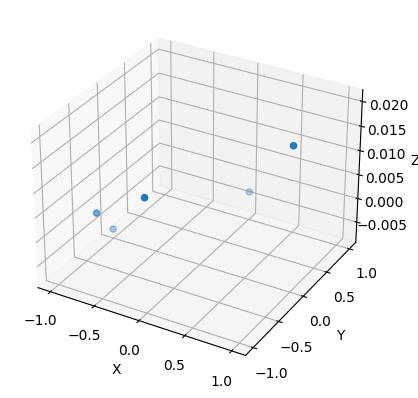

In [ ]:
import matplotlib.pyplot as plt

# Extract the x, y, and z coordinates from the transform column of the DataFrame
x_coords = [row[0] for row in df['[LiDARCalibrationComponent].extrinsic.transform']]
y_coords = [row[1] for row in df['[LiDARCalibrationComponent].extrinsic.transform']]
z_coords = [row[2] for row in df['[LiDARCalibrationComponent].extrinsic.transform']]

# Plot the x, y, and z coordinates
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_coords, y_coords, z_coords)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

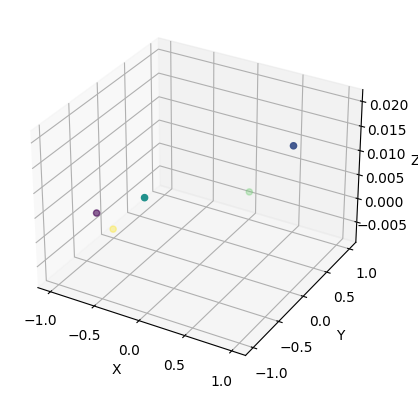

In [ ]:
import matplotlib.pyplot as plt

# Extract the x, y, and z coordinates from the transform column of the DataFrame
x_coords = [row[0] for row in df['[LiDARCalibrationComponent].extrinsic.transform']]
y_coords = [row[1] for row in df['[LiDARCalibrationComponent].extrinsic.transform']]
z_coords = [row[2] for row in df['[LiDARCalibrationComponent].extrinsic.transform']]

# Extract the laser max values from the DataFrame
laser_max = df['key.laser_name']

# Plot the x, y, and z coordinates, color coded by the laser_max values
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_coords, y_coords, z_coords, c=laser_max)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

<ipython-input-7-3aeebd89ba7e>:23: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(mappable)


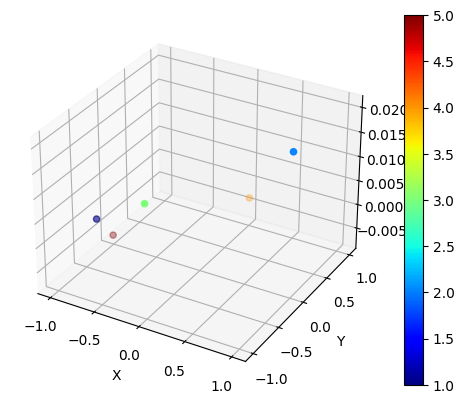

In [7]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Extract the x, y, and z coordinates from the transform column of the DataFrame
x_coords = [row[0] for row in df['[LiDARCalibrationComponent].extrinsic.transform']]
y_coords = [row[1] for row in df['[LiDARCalibrationComponent].extrinsic.transform']]
z_coords = [row[2] for row in df['[LiDARCalibrationComponent].extrinsic.transform']]

# Extract the laser max values from the DataFrame
laser_max = df['key.laser_name']

# Plot the x, y, and z coordinates, color coded by the laser_max values
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_coords, y_coords, z_coords, c=laser_max, cmap=cm.jet)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Add a colorbar to the plot
mappable = cm.ScalarMappable(cmap=cm.jet)
mappable.set_array(laser_max)
plt.colorbar(mappable)

plt.show()

<ipython-input-8-74d0b886cb18>:28: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(mappable)


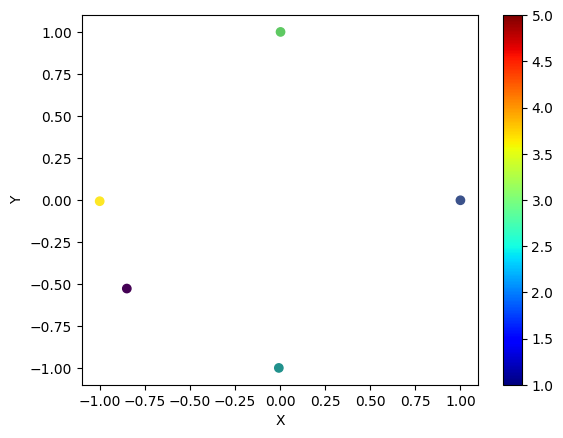

In [8]:
import matplotlib.pyplot as plt

# Extract the x and y coordinates from the transform column of the DataFrame
x_coords = [row[0] for row in df['[LiDARCalibrationComponent].extrinsic.transform']]
y_coords = [row[1] for row in df['[LiDARCalibrationComponent].extrinsic.transform']]

# Extract the laser max values from the DataFrame
laser_max = df['key.laser_name']
# Create a dictionary to map laser names to colors
laser_colors = {
    2: 'side_left',
    5: 'side_right',
    3: 'back_left',
    4: 'back_right',
    1: 'front_right'
}

# Plot the x and y coordinates, color coded by the laser_max values
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_coords, y_coords, c=laser_max)
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Add a colorbar to the plot
mappable = cm.ScalarMappable(cmap=cm.jet)
mappable.set_array(laser_max)
plt.colorbar(mappable)
plt.show()

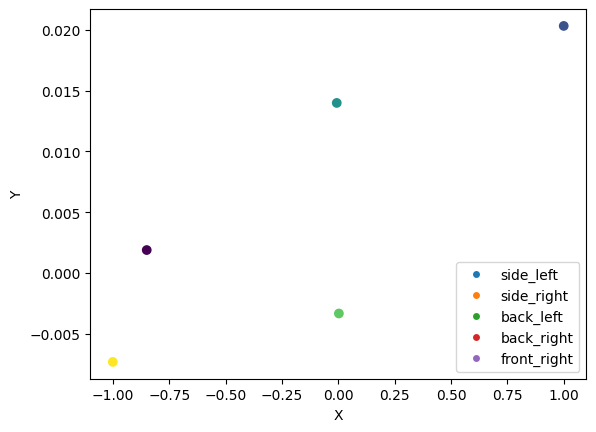

In [9]:
import matplotlib.pyplot as plt

# Define the mapping of integer laser names to string values
laser_name_map = {
    2: 'side_left',
    5: 'side_right',
    3: 'back_left',
    4: 'back_right',
    1: 'front_right'
}

# Extract the x and y coordinates from the transform column of the DataFrame
x_coords = [row[0] for row in df['[LiDARCalibrationComponent].extrinsic.transform']]
y_coords = [row[1] for row in df['[LiDARCalibrationComponent].extrinsic.transform']]

# Extract the laser max values from the DataFrame
laser_max = df['key.laser_name']

# Convert the integer laser names to string values
laser_names = [laser_name_map.get(n, str(n)) for n in laser_max]

# Plot the x and y coordinates, color coded by the laser_max values
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_coords, z_coords, c=laser_max)
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Generate the legend using the laser_name_map dictionary
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=name, markerfacecolor=color)
                   for name, color in zip(laser_name_map.values(), plt.cm.tab10.colors)]
ax.legend(handles=legend_elements, loc='lower right')

plt.show()


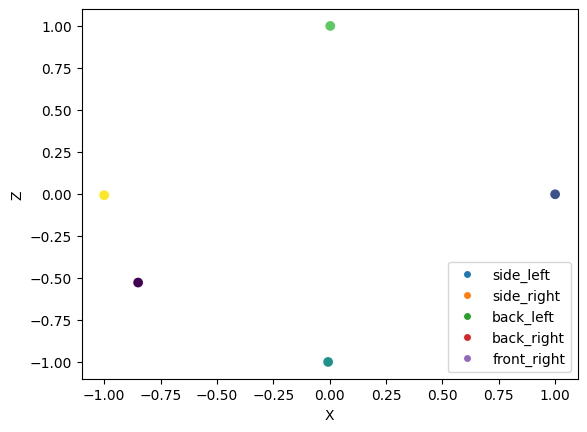

In [10]:
import matplotlib.pyplot as plt

# Define the mapping of integer laser names to string values
laser_name_map = {
    2: 'side_left',
    5: 'side_right',
    3: 'back_left',
    4: 'back_right',
    1: 'front_right'
}

# Extract the x and y coordinates from the transform column of the DataFrame
x_coords = [row[0] for row in df['[LiDARCalibrationComponent].extrinsic.transform']]
z_coords = [row[2] for row in df['[LiDARCalibrationComponent].extrinsic.transform']]

# Extract the laser max values from the DataFrame
laser_max = df['key.laser_name']

# Convert the integer laser names to string values
laser_names = [laser_name_map.get(n, str(n)) for n in laser_max]

# Plot the x and y coordinates, color coded by the laser_max values
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_coords, y_coords, c=laser_max)
ax.set_xlabel('X')
ax.set_ylabel('Z')

# Generate the legend using the laser_name_map dictionary
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=name, markerfacecolor=color)
                   for name, color in zip(laser_name_map.values(), plt.cm.tab10.colors)]
ax.legend(handles=legend_elements, loc='lower right')

plt.show()

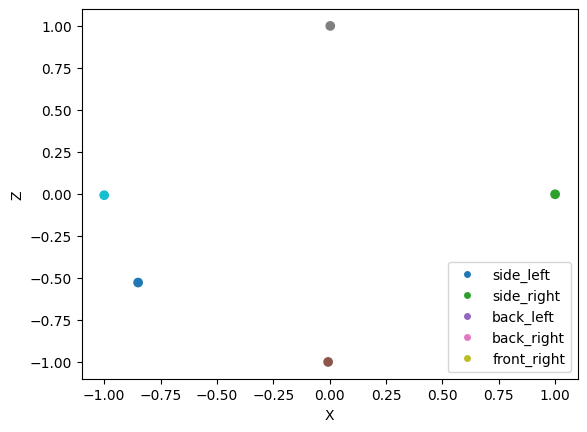

In [11]:
import matplotlib.pyplot as plt

# Define the mapping of integer laser names to string values
laser_name_map = {
    2: 'side_left',
    5: 'side_right',
    3: 'back_left',
    4: 'back_right',
    1: 'front_right'
}

# Extract the x and y coordinates from the transform column of the DataFrame
x_coords = [row[0] for row in df['[LiDARCalibrationComponent].extrinsic.transform']]
z_coords = [row[2] for row in df['[LiDARCalibrationComponent].extrinsic.transform']]

# Extract the laser max values from the DataFrame
laser_max = df['key.laser_name']

# Convert the integer laser names to string values
laser_names = [laser_name_map.get(n, str(n)) for n in laser_max]

# Plot the x and y coordinates, color coded by the laser_max values
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x_coords, y_coords, c=laser_max, cmap='tab10')
ax.set_xlabel('X')
ax.set_ylabel('Z')

# Generate the legend with the laser_name_map and color map
handles = []
for i, name in enumerate(laser_name_map.values()):
    color = scatter.cmap(i / len(laser_name_map))
    handles.append(plt.Line2D([0], [0], marker='o', color='w', label=name, markerfacecolor=color))

# Combine the handles into a single legend and display it
ax.legend(handles=handles, loc='lower right')

plt.show()


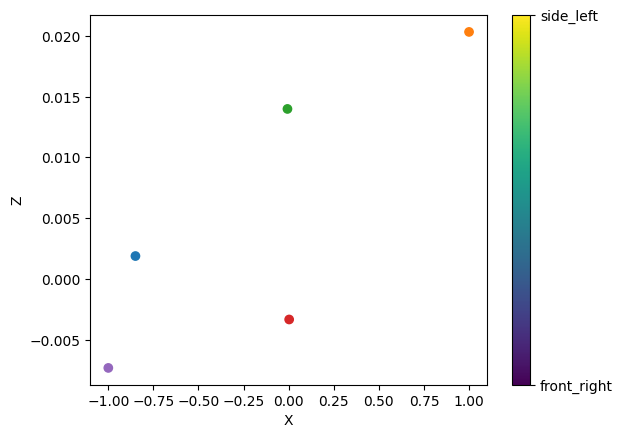

In [12]:
# Define the laser name to color mapping
laser_color_map = {
    'front_right': 'tab:blue',
    'side_left': 'tab:orange',
    'back_left': 'tab:green',
    'back_right': 'tab:red',
    'side_right': 'tab:purple'
}

# Convert the integer laser names to string values
laser_names = [laser_name_map.get(n, str(n)) for n in laser_max]

# Create a list of color values corresponding to the laser names
laser_colors = [laser_color_map.get(name, 'black') for name in laser_names]

# Plot the x and y coordinates, color coded by the laser names
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x_coords, z_coords, c=laser_colors)
ax.set_xlabel('X')
ax.set_ylabel('Z')

# Add a color bar
colorbar = plt.colorbar(scatter, ticks=range(len(laser_color_map)))
colorbar.ax.set_yticklabels(list(laser_color_map.keys()))

# Show the plot
plt.show()

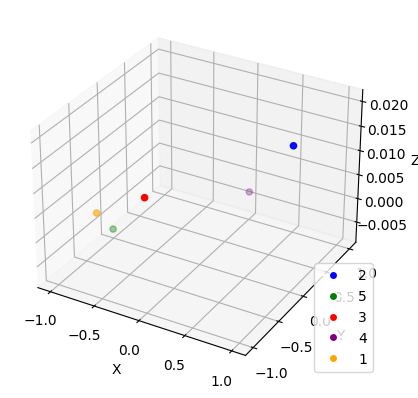

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Extract the x, y, and z coordinates from the transform column of the DataFrame
x_coords = [row[0] for row in df['[LiDARCalibrationComponent].extrinsic.transform']]
y_coords = [row[1] for row in df['[LiDARCalibrationComponent].extrinsic.transform']]
z_coords = [row[2] for row in df['[LiDARCalibrationComponent].extrinsic.transform']]

# Extract the laser names from the DataFrame
laser_names = df['key.laser_name']

# Map the laser names to the corresponding colors
laser_colors = {
    2: 'blue',
    5: 'green',
    3: 'red',
    4: 'purple',
    1: 'orange'
}
colors = [laser_colors.get(n, 'black') for n in laser_names]

# Plot the x, y, and z coordinates, color coded by the laser names
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_coords, y_coords, z_coords, c=colors)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Create a legend for the laser colors
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=name, markerfacecolor=color)
                   for name, color in laser_colors.items()]
ax.legend(handles=legend_elements, loc='lower right')

# Show the plot
plt.show()

In [15]:
print(df.columns)

Index(['key.segment_context_name', 'key.laser_name',
       '[LiDARCalibrationComponent].extrinsic.transform',
       '[LiDARCalibrationComponent].beam_inclination.min',
       '[LiDARCalibrationComponent].beam_inclination.max',
       '[LiDARCalibrationComponent].beam_inclination.values'],
      dtype='object')


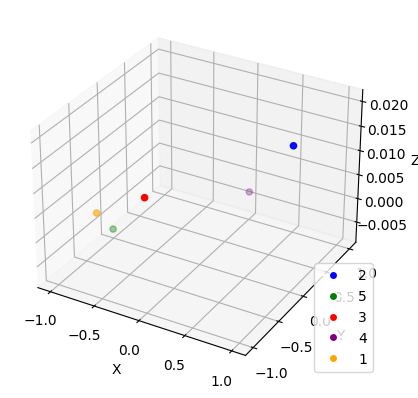

In [21]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Define the laser ID to color mapping
laser_colors = {
    2: 'blue',
    5: 'green',
    3: 'red',
    4: 'purple',
    1: 'orange'
}

# Define the laser ID to label mapping
laser_names = {
    2: 'side_left',
    5: 'side_right',
    3: 'back_left',
    4: 'back_right',
    1: 'front_right'
}

# Extract the x, y, and z coordinates from the transform column of the DataFrame
x_coords = [row[0] for row in df['[LiDARCalibrationComponent].extrinsic.transform']]
y_coords = [row[1] for row in df['[LiDARCalibrationComponent].extrinsic.transform']]
z_coords = [row[2] for row in df['[LiDARCalibrationComponent].extrinsic.transform']]


# Extract the laser names from the DataFrame
laser_names = df['key.laser_name']

# Map the laser IDs to the corresponding colors and labels
colors = [laser_colors.get(n, 'black') for n in laser_names]


# Plot the x, y, and z coordinates, color coded by the laser IDs and labeled with the laser names
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_coords, y_coords, z_coords, c=colors, label=laser_names)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Create a legend for the laser colors
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=name, markerfacecolor=color)
                   for name, color in laser_colors.items()]
ax.legend(handles=legend_elements, loc='lower right')

# Show the plot
plt.show()